In [26]:
def read_fortran(filename):
    """ Reads Fortran style binary data and returns a numpy array.
    """
    with open(filename, 'rb') as file:                                                                              # read size of record
        file.seek(0)
        n = np.fromfile(file, dtype='int32', count=1)[0]

        # read contents of record
        file.seek(4)
        v = np.fromfile(file, dtype='float32')

    return v[:-1]

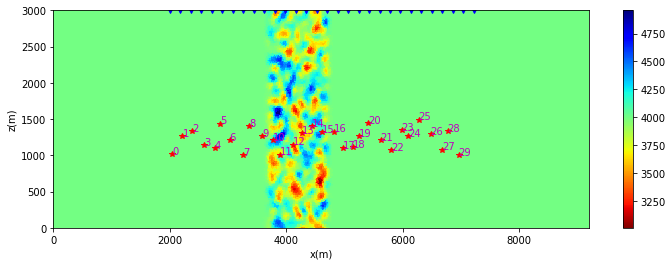

In [29]:
# %load scripts/plotmodel.py
#!/usr/bin/env python
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

src = pd.read_table('data/sources.dat',delim_whitespace=True,names=['x','z'])
rc = pd.read_table('data/STATIONS',delim_whitespace=True,names=['sname','net','x','z','cc1','cc2'])

# f=open('model_true/proc000000_x.bin',"rb")
# x=np.fromfile(f,dtype=np.float32)
# f=open('model_true/proc000000_z.bin',"rb")
# z=np.fromfile(f,dtype=np.float32)
# f=open('model_true/proc000000_vs.bin',"rb")
# vs=np.fromfile(f,dtype=np.float32)

x=read_fortran('./model_true/proc000000_x.bin')
z=read_fortran('./model_true/proc000000_z.bin')
vs = read_fortran('./model_true/proc000000_vs.bin')

plt.figure(figsize=(12,4))
sc=plt.tripcolor(x,z,vs,cmap='jet_r')

plt.plot(src['x'],src['z'],'r*')
plt.plot(rc['x'],rc['z'],'bv')
for ii in range(len(src)):
    plt.text(src['x'].iloc[ii],src['z'].iloc[ii],str(ii),color='m')
plt.xlabel('x(m)')
plt.ylabel('z(m)')
plt.xlim([x.min(),x.max()])
plt.ylim([z.min(),z.max()])
plt.colorbar()
#plt.gca().invert_yaxis()
#plt.savefig('invertvs.png')


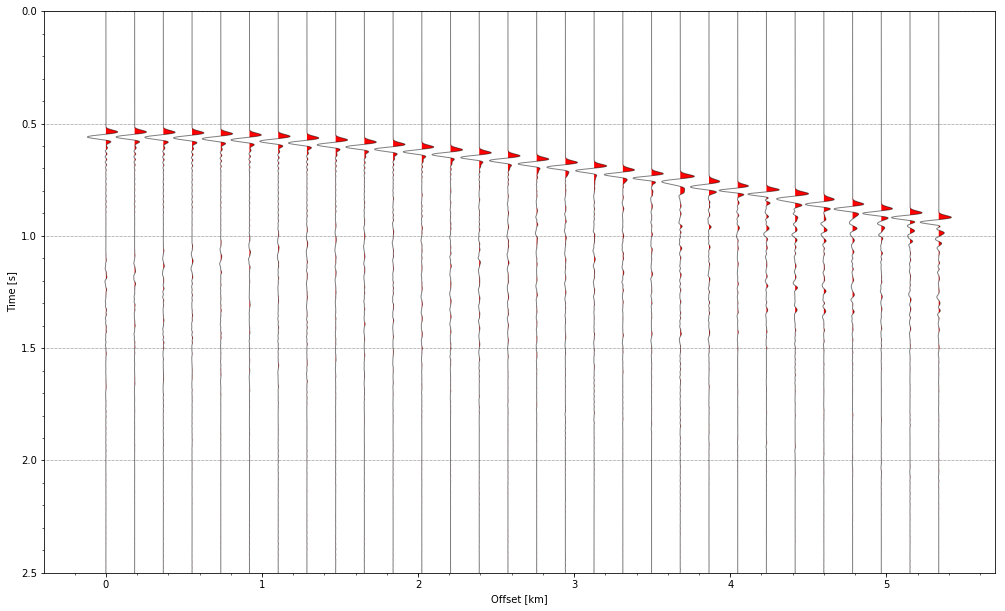

In [21]:
from obspy import read
st = read('/Users/hongjianfang/Uy_file_single.su')
fig = plt.figure(figsize=(15,10))
for ii in range(len(st)):
    st[ii].stats.distance=ii*1000/50.0*9.2
st.plot(type='section',scale=1.0,time_down=True,recordlength=2.5,fillcolors=('red','None'),fig=fig)
#plt.title('src:'+str(choosetoshow[isrc]))

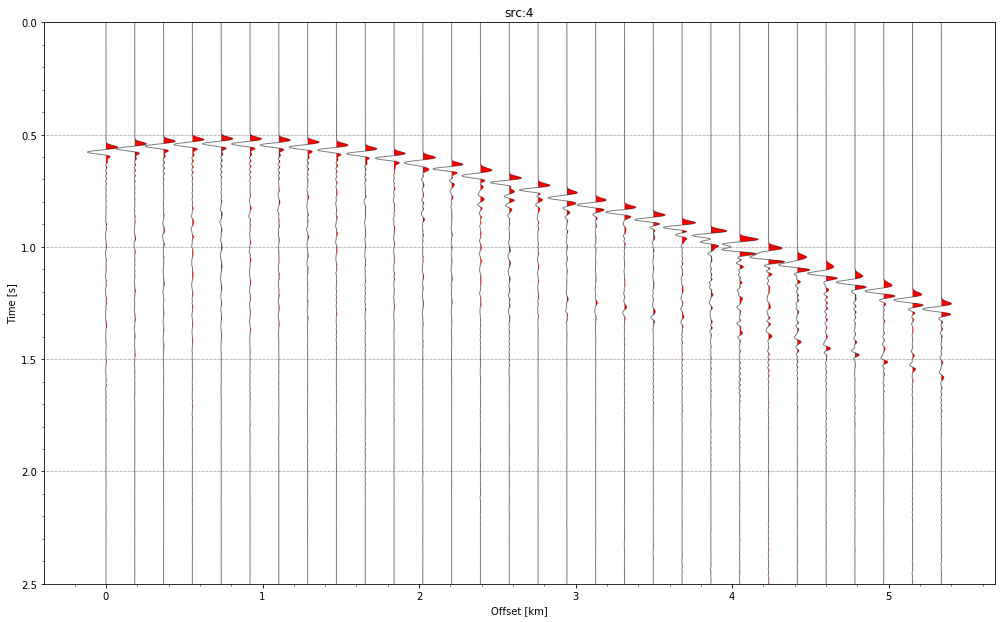

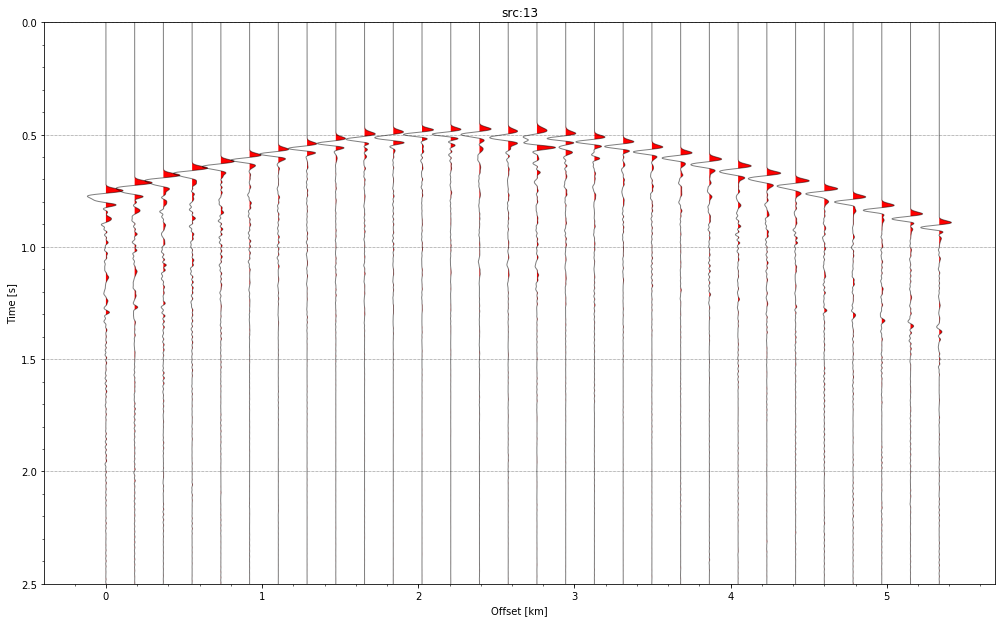

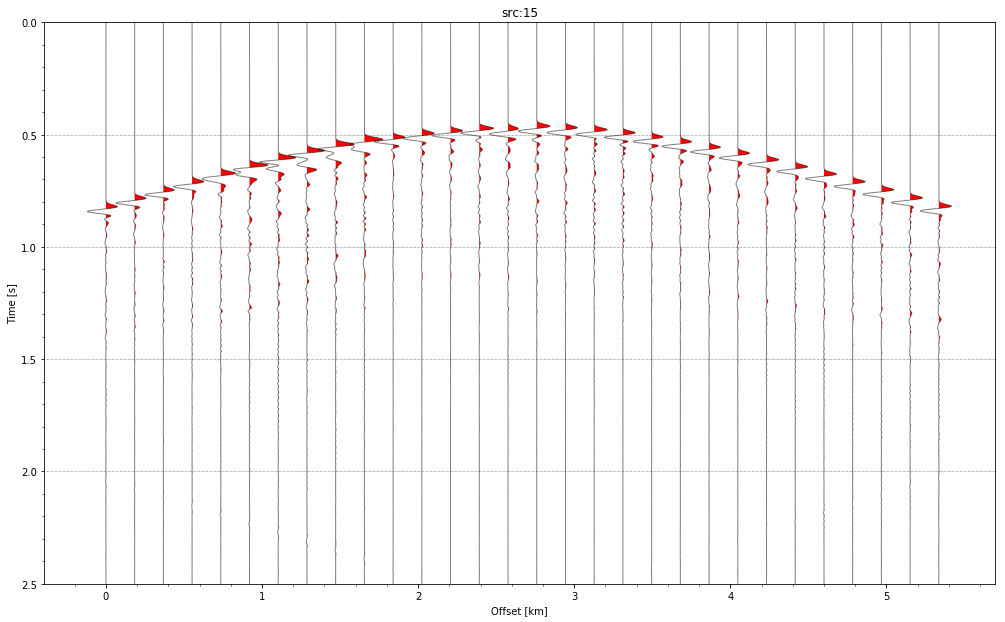

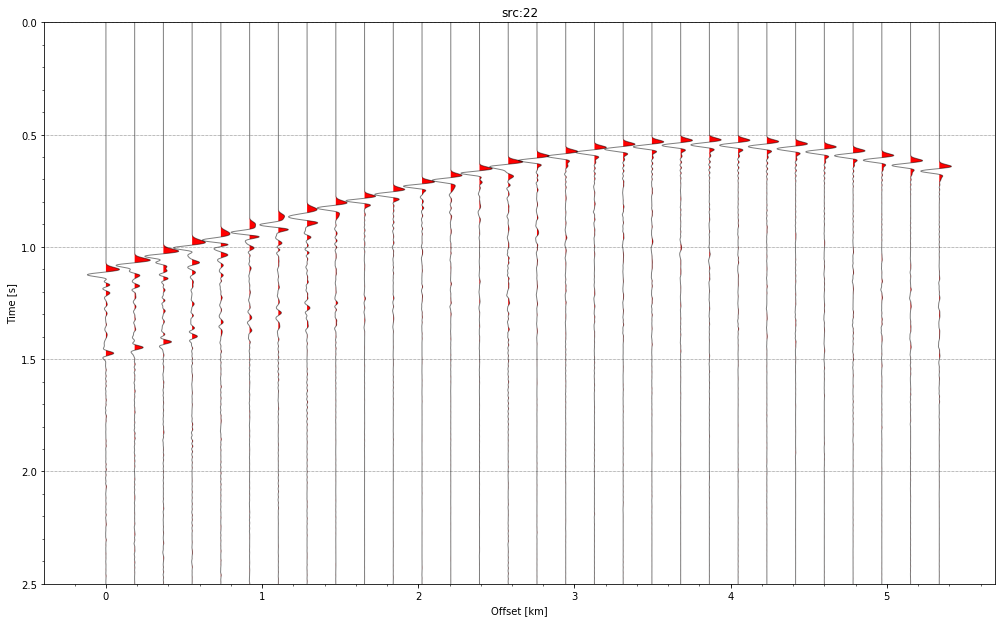

In [31]:
from obspy import read
from matplotlib import pyplot as plt
choosetoshow = [4,13,15,22]
for isrc  in range(len(choosetoshow)):
    st = read('data/000'+str(choosetoshow[isrc]).zfill(2)+'/Uy_file_single.su')
    fig = plt.figure(figsize=(15,10))
    for ii in range(len(st)):
        st[ii].stats.distance=ii*1000/50.0*9.2
    st.plot(type='section',scale=1.0,time_down=True,recordlength=2.5,fillcolors=('red','None'),fig=fig)
    plt.title('src:'+str(choosetoshow[isrc]))


In [8]:
import pykonal
from matplotlib import pyplot as plt
import numpy as np 
import pandas as pd

src = pd.read_table('data/sources.dat',delim_whitespace=True,names=['x','z'])
rc = pd.read_table('data/STATIONS',delim_whitespace=True,names=['sname','net','x','z','cc1','cc2'])

solver = pykonal.EikonalSolver()
solver.vgrid.min_coords     = 0, 0, 0
solver.vgrid.node_intervals = 1, 1, 1
# solver.vgrid.node_intervals = 0.1, 0.1, 1
solver.vgrid.npts           = 30, 92, 2
solver.pgrid.min_coords     = solver.vgrid.min_coords
solver.pgrid.node_intervals = solver.vgrid.node_intervals/4
solver.pgrid.npts           = solver.vgrid.npts*4-3
solver.vv = np.ones(solver.vgrid.npts)*4.0

srcdimz = 30
srcdimx = 92
dimr = 100
srcix = srcdimz-src['z']/dimr
srcix = np.round(srcix/solver.pgrid.node_intervals[0])
srciy = src['x']/dimr
srciy = np.round(srciy/solver.pgrid.node_intervals[1])
rcx = srcdimz-rc['z']/dimr+1.0
rcy = rc['x']/dimr

nsrc = len(srcix)
nrc = len(rcx)
dobs = np.zeros((nsrc,nrc))

solver.clear_sources()
for isrc in range(nsrc):
    print (isrc,'th source')
    srcf = (int(srcix[isrc]),int(srciy[isrc]),1)
    solver.add_source(srcf)
    solver.solve()
    ui = pykonal.LinearInterpolator3D(solver.pgrid, solver.uu)
    
    for irc in range(len(rcx)):
        rcp = (rcx[irc],rcy[irc],0.2)
        ray = solver.trace_ray(rcp,tolerance=1e-3)
        dobs[isrc,irc] = ui(rcp)
    solver.clear_sources()

(0, 'th source')


OutOfBoundsError: 

In [9]:
rcp

(1.1000000000000014, 72.7, 0.2)

In [4]:
ray = solver.trace_ray((0.10000000000000142, 35, 0.1),tolerance=1e-3)

finishing 


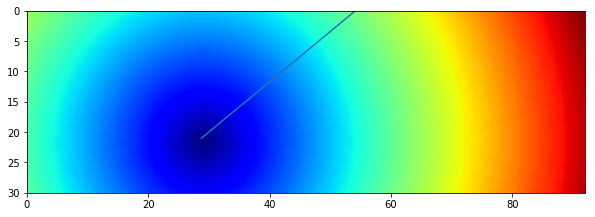

In [119]:
solver = pykonal.EikonalSolver()
solver.vgrid.min_coords     = 0, 0, 0
solver.vgrid.node_intervals = 1, 1, 1
# solver.vgrid.node_intervals = 0.1, 0.1, 1
solver.vgrid.npts           = 30, 92, 2
solver.pgrid.min_coords     = solver.vgrid.min_coords
solver.pgrid.node_intervals = solver.vgrid.node_intervals/4
solver.pgrid.npts           = solver.vgrid.npts*4-3
solver.vv = np.ones(solver.vgrid.npts)*4.0
srcf = (84, 115, 1)
solver.add_source(srcf)
solver.solve()
print('finishing ')

#ray = solver.trace_ray((0.2,0.2,0.1),tolerance=1e-4)
ray = solver.trace_ray((0.1,54,0.1),tolerance=1e-4)
fig = plt.figure(figsize=(10,4))
plt.imshow(solver.uu[:,:,0],extent=(0,92,30,0),cmap='jet')
# plt.imshow(solver.uu[:,:,0],extent=(0,9.2,3.0,0),cmap='jet')
plt.plot(ray[:,1],ray[:,0])

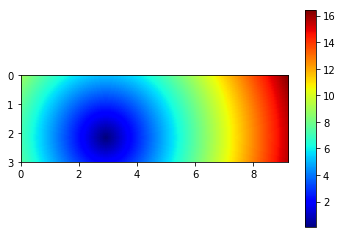

In [42]:
plt.imshow(solver.uu[:,:,0],extent=(0,9.2,3,0),cmap='jet')
plt.colorbar()

In [ ]:
rcy

In [23]:
srcdimz = 30
srcdimx = 92
dimr = 100
srcix = srcdimz-src['z']/dimr
srcix = np.round(srcix/solver.pgrid.node_intervals[0])
srciy = src['x']/dimr
srciy = np.round(srciy/solver.pgrid.node_intervals[1])

rcx = srcdimz-rc['z']/dimr
rcy = rc['x']/dimr

solver.vv = np.ones(solver.vgrid.npts)*4.0

solver.clear_sources()

nsrc = len(srcix)
nrc = len(rcx)
dobs = np.zeros((nsrc,nrc))

for isrc in range(nsrc):
    print (isrc,'th source')
    srcf = (int(srcix[isrc]),int(srciy[isrc]),1)
    solver.add_source(srcf)
    solver.solve()
    ui = pykonal.LinearInterpolator3D(solver.pgrid, solver.uu)
    
    for irc in range(len(rcx)):
        rcp = (rcx[irc],rcy[irc],0.1)
        ray = solver.trace_ray(rcp,tolerance=1e-3)
        dobs[isrc,irc] = ui(rcp)
#         plt.plot(ray[:,1],ray[:,0])
    solver.clear_sources()
    


(0, 'th source')


OutOfBoundsError: 

(0, 'th source')


OutOfBoundsError: 

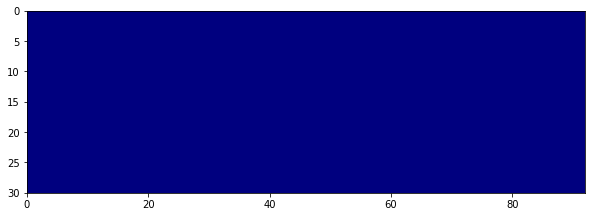

In [116]:
fig = plt.figure(figsize=(10,4))
plt.imshow(solver.vv[:,:,0],extent=(0,92,30,0),cmap='jet')
solver.vv = np.ones(solver.vgrid.npts)*4.0


solver.clear_sources()

nsrc = len(srcix)
nrc = len(rcx)
dsyn = np.zeros((nsrc,nrc))

for isrc in range(nsrc):
    print (isrc,'th source')
    srcf = (int(srcix[isrc]),int(srciy[isrc]),1)
    solver.add_source(srcf)
    solver.solve()
    ui = pykonal.LinearInterpolator3D(solver.pgrid, solver.uu)
    
    for irc in range(len(rcx)):
        rcp = (rcx[irc],int(rcy[irc]),0.1)
        ray = solver.trace_ray(rcp,tolerance=1e-3)
        dsyn[isrc,irc] = ui(rcp)
#         plt.plot(ray[:,1],ray[:,0])
    solver.clear_sources()
    

In [118]:
ray = solver.trace_ray((0.1,54,0.1),tolerance=1e-4)

OutOfBoundsError: 

In [117]:
rcp

(0.10000000000000142, 54, 0.1)

In [83]:
ray = solver.trace_ray(rcp,tolerance=1e-4)

OutOfBoundsError: 

In [86]:
rcp

(0.10000000000000142, 35.3, 0.1)

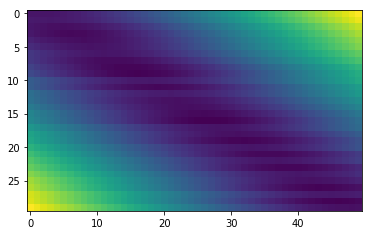

In [53]:
plt.imshow(dobs)

In [ ]:
#%matplotlib ipympl
import pykonal
import matplotlib
from matplotlib import pyplot as plt
import numpy as np 
import pandas as pd

## Load data

srcs = pd.read_csv('data/sources.dat',delim_whitespace=True,names=['x','z'])
rcs  = pd.read_csv('data/STATIONS',delim_whitespace=True,names=['sname','net','x','z','cc1','cc2'])

# I am using the y-axis as the vertical axis; it is positive downwards.
srcs['y'] = 3e3 - srcs['z']
# Set the z-coordinate = 0 everywhere to keep everything in the xy-plane
srcs['z'] = 0
# Again for receivers...
rcs['y']  = 3e3 - rcs['z']
rcs['z']  = 0

## Calculate travel times

# The source and receiver locations appear to be in units of [m], so I will
# use units of [m] for distance and [m/s] for velocity to stay consistent.
solver = pykonal.EikonalSolver()
solver.vgrid.min_coords     = 0, 0, 0
solver.vgrid.node_intervals = 100, 100, 1 # Node intervals in [m]
solver.vgrid.npts           = 91, 31, 1
solver.pgrid.min_coords     = solver.vgrid.min_coords
solver.pgrid.node_intervals = solver.vgrid.node_intervals
solver.pgrid.npts           = solver.vgrid.npts
solver.vv = np.ones(solver.vgrid.npts) * 4e3 # Velocity in [m/s]

dobs = np.zeros((len(srcs), len(rcs)))

for isrc, src_row in srcs.iterrows():
    src = src_row[['x', 'y', 'z']]
    solver.clear_sources()
    print src
    solver.add_source(src)
    solver.solve()
    #ui = pykonal.LinearInterpolator3D(solver.pgrid, solver.uu)
    for irc, rc_row in rcs.iterrows():
        rc  = rc_row[['x', 'y', 'z']]
        #print (rc)
# Ray tracing is very slow right now
#         ray = solver.trace_ray(rc)
        dobs[isrc,irc] = ui(rc)

## Plotting

def plot(solver):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1, aspect=1)
    ax.pcolormesh(
        solver.pgrid[:, :, 0, 0], 
        solver.pgrid[:, :, 0, 1], 
        solver.uu[:, :, 0], 
        cmap=plt.get_cmap('jet_r')
    )
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.invert_yaxis()

plot(solver)
